# Notebook Analyse Exploratoire

## Kaggle Challenge: House Prices - Advanced Regression Techniques

In [180]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [182]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

SalePrice = train_data['SalePrice']
train_data.drop(columns=['SalePrice'], inplace=True)

data = pd.concat([train_data, test_data])
data.set_index('Id', inplace=True)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


### Traitements des NaN

In [183]:
feat_nan = data.columns[(data.isna().sum() > 0).values]
data[feat_nan].head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


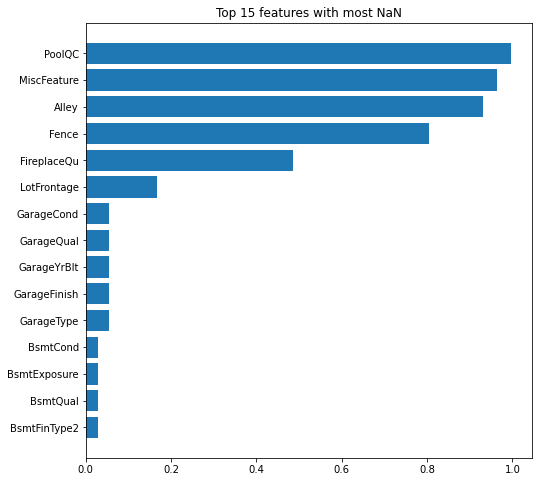

In [184]:
count_NaN = data.isnull().sum().sort_values(ascending=False)/data.shape[0]
col_name = count_NaN.index
top_n = 15
pos = np.arange(top_n) + 0.5

plt.figure(figsize=(8, 8))
plt.barh(pos, count_NaN.values[:top_n][::-1], align='center')
plt.yticks(pos, col_name[:top_n][::-1])
plt.title('Top 15 features with most NaN')
plt.show()

On supprime les 5 premiers variables qui contiennent plus 50% des valeurs manquantes. 

In [185]:
data = data.dropna(axis=1, thresh=len(data)*0.6, how='all')

Pour la variable ‘LotFrontage’, on remplace les NaN par la mediane en groupant les données selon le quartier de la maison.

In [186]:
LFrontage_nhood = data.groupby('Neighborhood')['LotFrontage']
data['LotFrontage'] = LFrontage_nhood.transform(lambda x: x.fillna(x.median()))

C:\Users\linaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Pour les autres variables, en fonction des situations, nous avons utilisé 2 méthodes : 
        
     - Remplis par la valeur nulle ou NA 
     - Remplacer par la valeur typique des variables


**Garage fearures**

**GarageType**: Emplacement du garage
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
**GarageYrBlt**: année de construction du garage
		
**GarageFinish**: Finition intérieure du garage
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

**GarageQual**: qualité du garage 
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
**GarageCond**: État du garage
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

**GarageCars** : Taille du garage en capacité de voiture

**GarageArea** : Taille du garage en pieds carrés  

In [187]:
data['GarageType'].fillna('NA', inplace=True)
data['GarageFinish'].fillna('NA', inplace=True)
data['GarageQual'].fillna('NA', inplace=True)
data['GarageCond'].fillna('NA', inplace=True)
data['GarageYrBlt'].fillna(0, inplace=True)
data['GarageCars'].fillna(0, inplace=True)
data['GarageArea'].fillna(0, inplace=True)

quality_map = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

data['GarageQual'].replace(quality_map, inplace=True)
data['GarageCond'].replace(quality_map, inplace=True)

quality_map = {"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}

data['GarageFinish'].replace(quality_map, inplace=True)

C:\Users\linaj\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\linaj\Anaconda3\lib\site-packages\pandas\core\series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


**Basement features**

**BsmtQual** - Evaluates the height of the basement/Évalue la hauteur du sous-sol

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
       
**BsmtCond**: Évalue l'état général du sous-sol: Excellent, Good, Typical, Fair, Poor, No Basement
	
**BsmtExposure**: Fait référence aux murs de débrayage ou au niveau du jardin

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

**BsmtFinType1**: Évaluation de la surface finie du sous-sol

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
**BsmtFinType2**: Évaluation de la surface finie du sous-sol (si plusieurs types)

**BsmtFinSF1** : Pieds carrés finis de type 1 

**BsmtFinSF2** : Pieds carrés finis de type 2 

**BsmtUnfSF**  : Pieds carrés non finis de sous-sol

**BsmtFullBath**   : Salle de bain complète au sous-sol

**BsmtHalfBath**   : toilettes au sous-sol

**TotalBsmtSF**: Superficie totale en pieds carrés du sous-sol 

In [188]:
data['BsmtFinSF1'].fillna(0.0, inplace=True)
data['BsmtFinSF2'].fillna(0.0, inplace=True)
data['BsmtUnfSF'].fillna(0.0, inplace=True)
data['BsmtFullBath'].fillna(0, inplace=True)
data['BsmtHalfBath'].fillna(0, inplace=True)
data['TotalBsmtSF'].fillna(0.0, inplace=True)

data['BsmtFinType1'].fillna('NA', inplace=True)
data['BsmtQual'].fillna('NA', inplace=True)
data['BsmtExposure'].fillna('NA', inplace=True)
data['BsmtCond'].fillna('NA', inplace=True)
data['BsmtFinType2'].fillna('NA', inplace=True)

# BsmtCond and BsmtQual
quality_map = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

data['BsmtCond'].replace(quality_map, inplace=True)
data['BsmtQual'].replace(quality_map, inplace=True)

# BsmtExposure
quality_map = {"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}

data['BsmtExposure'].replace(quality_map, inplace=True)

Pour les autre variables, on les impute par leur valeur typique.

In [189]:
feats = data.columns[(data.isna().sum() > 0).values]
for x in feats:
    data[x].fillna(data[x].mode()[0], inplace=True)

C:\Users\linaj\Anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


### Feature Engineering

In [190]:
data['has2ndfloor'] = (data['2ndFlrSF'] > 0) * 1
data['hasBasement'] = (data.TotalBsmtSF > 0) * 1
data['hasGarage'] = (data.GarageCars > 0) * 1
data['hasPool'] = (data.PoolArea > 0) * 1

data['Total_InteriorSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] \
                           + data['2ndFlrSF']

data['Total_Bathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) \
                          + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

data['Total_porch_sf'] = data['OpenPorchSF'] + data['3SsnPorch'] \
                         + data['EnclosedPorch'] + data['ScreenPorch'] \
                         + data['WoodDeckSF']

C:\Users\linaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\linaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\linaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [191]:
data.drop(columns=['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'],
          axis=1, inplace=True)

**Variables temporelles**

- YearBuilt: Original construction date

- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

- GarageYrBlt: Year garage was built

- YrSold: Year Sold (YYYY)

- MoSold: Month Sold (MM)

In [192]:
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['RemodYears'] = data['YrSold'] - data['YearRemodAdd']
data['GarageAge'] = data['YrSold'] - data['GarageYrBlt']

data['HouseAge'] = data.HouseAge.apply(lambda x: 0 if x < 0 else x)
data['RemodYears'] = data.RemodYears.apply(lambda x: 0 if x < 0 else x)
data['GarageAge'] = data.GarageAge.apply(lambda x: 0 if x < 0 else x)

data.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold',\
                   'MoSold'], axis=1, inplace=True)

9:73: E502 the backslash is redundant between brackets
9:73: E502 the backslash is redundant between brackets
9:73: E502 the backslash is redundant between brackets
9:73: E502 the backslash is redundant between brackets
9:73: E502 the backslash is redundant between brackets


### Variables catégorielles

In [193]:
data['MSSubClass'] = data['MSSubClass'].astype(object)
cat_feature = [x for x in data.select_dtypes(include='object').columns]
data[cat_feature].describe()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,PavedDrive,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,16,5,2,4,4,2,5,3,25,9,...,6,5,2,5,4,7,7,3,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Y,WD,Normal
freq,1079,2269,2907,1859,2622,2918,2133,2778,443,2511,...,2874,1493,2723,2672,1493,2719,1723,2641,2526,2402


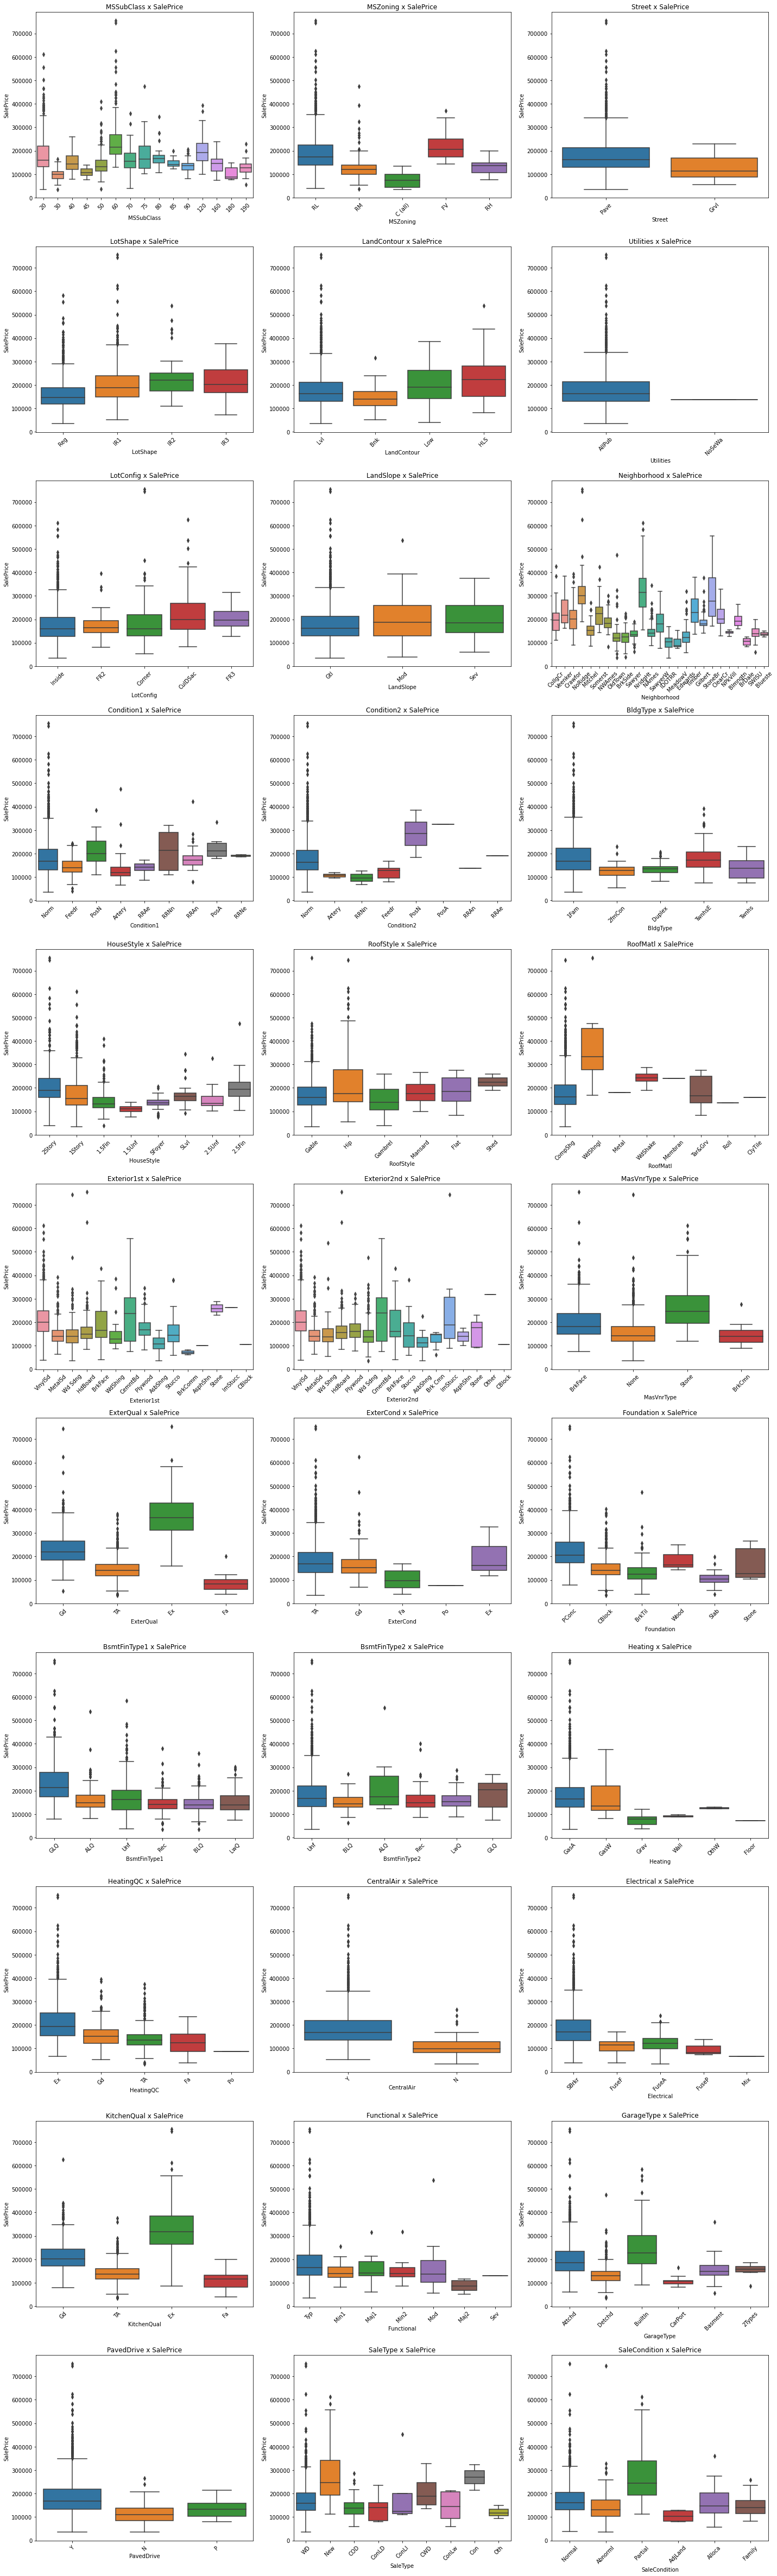

In [194]:
fig, ax = plt.subplots(11, 3, figsize=(20, len(cat_feature) * 2))
for idx, feature in enumerate(cat_feature):
    sns.boxplot(x=feature, y=SalePrice, data=train_data,
                ax=ax[idx // 3, idx % 3])
    ax[idx // 3, idx % 3].set_title(f'{feature} x SalePrice')
    ax[idx // 3, idx % 3].xaxis.set_tick_params(rotation=45)

plt.tight_layout()

#### Transformation en variable ordinaire

In [195]:
data['CentralAir'] = pd.get_dummies(data.CentralAir, drop_first=True)
data['Street'] = pd.get_dummies(data.Street, drop_first=True)

quality_map = {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}
data['KitchenQual'].replace(quality_map, inplace=True)

quality_map = {'Sev': 0, 'Mod': 1, 'Gtl': 2}
data.LandSlope.replace(quality_map, inplace=True)

quality_map = {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3}
data.LotShape.replace(quality_map, inplace=True)

quality_map = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}

data['ExterQual'].replace(quality_map, inplace=True)
data['ExterCond'].replace(quality_map, inplace=True)
data['HeatingQC'].replace(quality_map, inplace=True)

quality_map = {"N": 1, "P": 2, "Y": 3}
data['PavedDrive'].replace(quality_map, inplace=True)

In [196]:
data.drop(columns=['Utilities'], axis=1, inplace=True)

#### One Hot Encoder avec get_dummies()

In [197]:
# generate binary values using get_dummies
cat_feature = data.select_dtypes(include='object').columns
data_dum = pd.get_dummies(data, columns=cat_feature)

data_dum.head()

,LotFrontage,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,1,3,2,7,5,196.0,4,3,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,1,3,2,6,8,0.0,3,3,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,1,2,2,7,5,162.0,4,3,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,1,2,2,7,5,0.0,3,3,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,1,2,2,8,5,350.0,4,3,...,0,0,0,1,0,0,0,0,1,0


In [198]:
data[cat_feature].describe()

,MSSubClass,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,MasVnrType,Foundation,BsmtFinType1,BsmtFinType2,Heating,Electrical,Functional,GarageType,SaleType,SaleCondition
count,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919,...,2919,2919,2919,2919,2919,2919,2919,2919,2919,2919
unique,16,5,4,5,25,9,8,5,8,6,...,4,6,7,7,6,5,7,7,9,6
top,20,RL,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,...,None,PConc,Unf,Unf,GasA,SBrkr,Typ,Attchd,WD,Normal
freq,1079,2269,2622,2133,443,2511,2889,2425,1471,2310,...,1766,1308,851,2493,2874,2672,2719,1723,2526,2402


### Analyse de la corrélation avec Target SalePrice

In [199]:
Xtrain = data_dum.iloc[train_data.index]
Xtrain['SalePrice'] = SalePrice.values.astype('float64')
Xtest = data_dum.iloc[test_data.Id-1]

C:\Users\linaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
quant_feat = [x for x in data.select_dtypes(include=[np.number]).columns]
quant_feat.append('SalePrice')
Xtrain[quant_feat] = Xtrain[quant_feat].astype('float')

C:\Users\linaj\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#### Variables à forte corrélation

In [201]:
corr = Xtrain[quant_feat].corr()
print(corr['SalePrice'].sort_values(ascending=False)[:20])

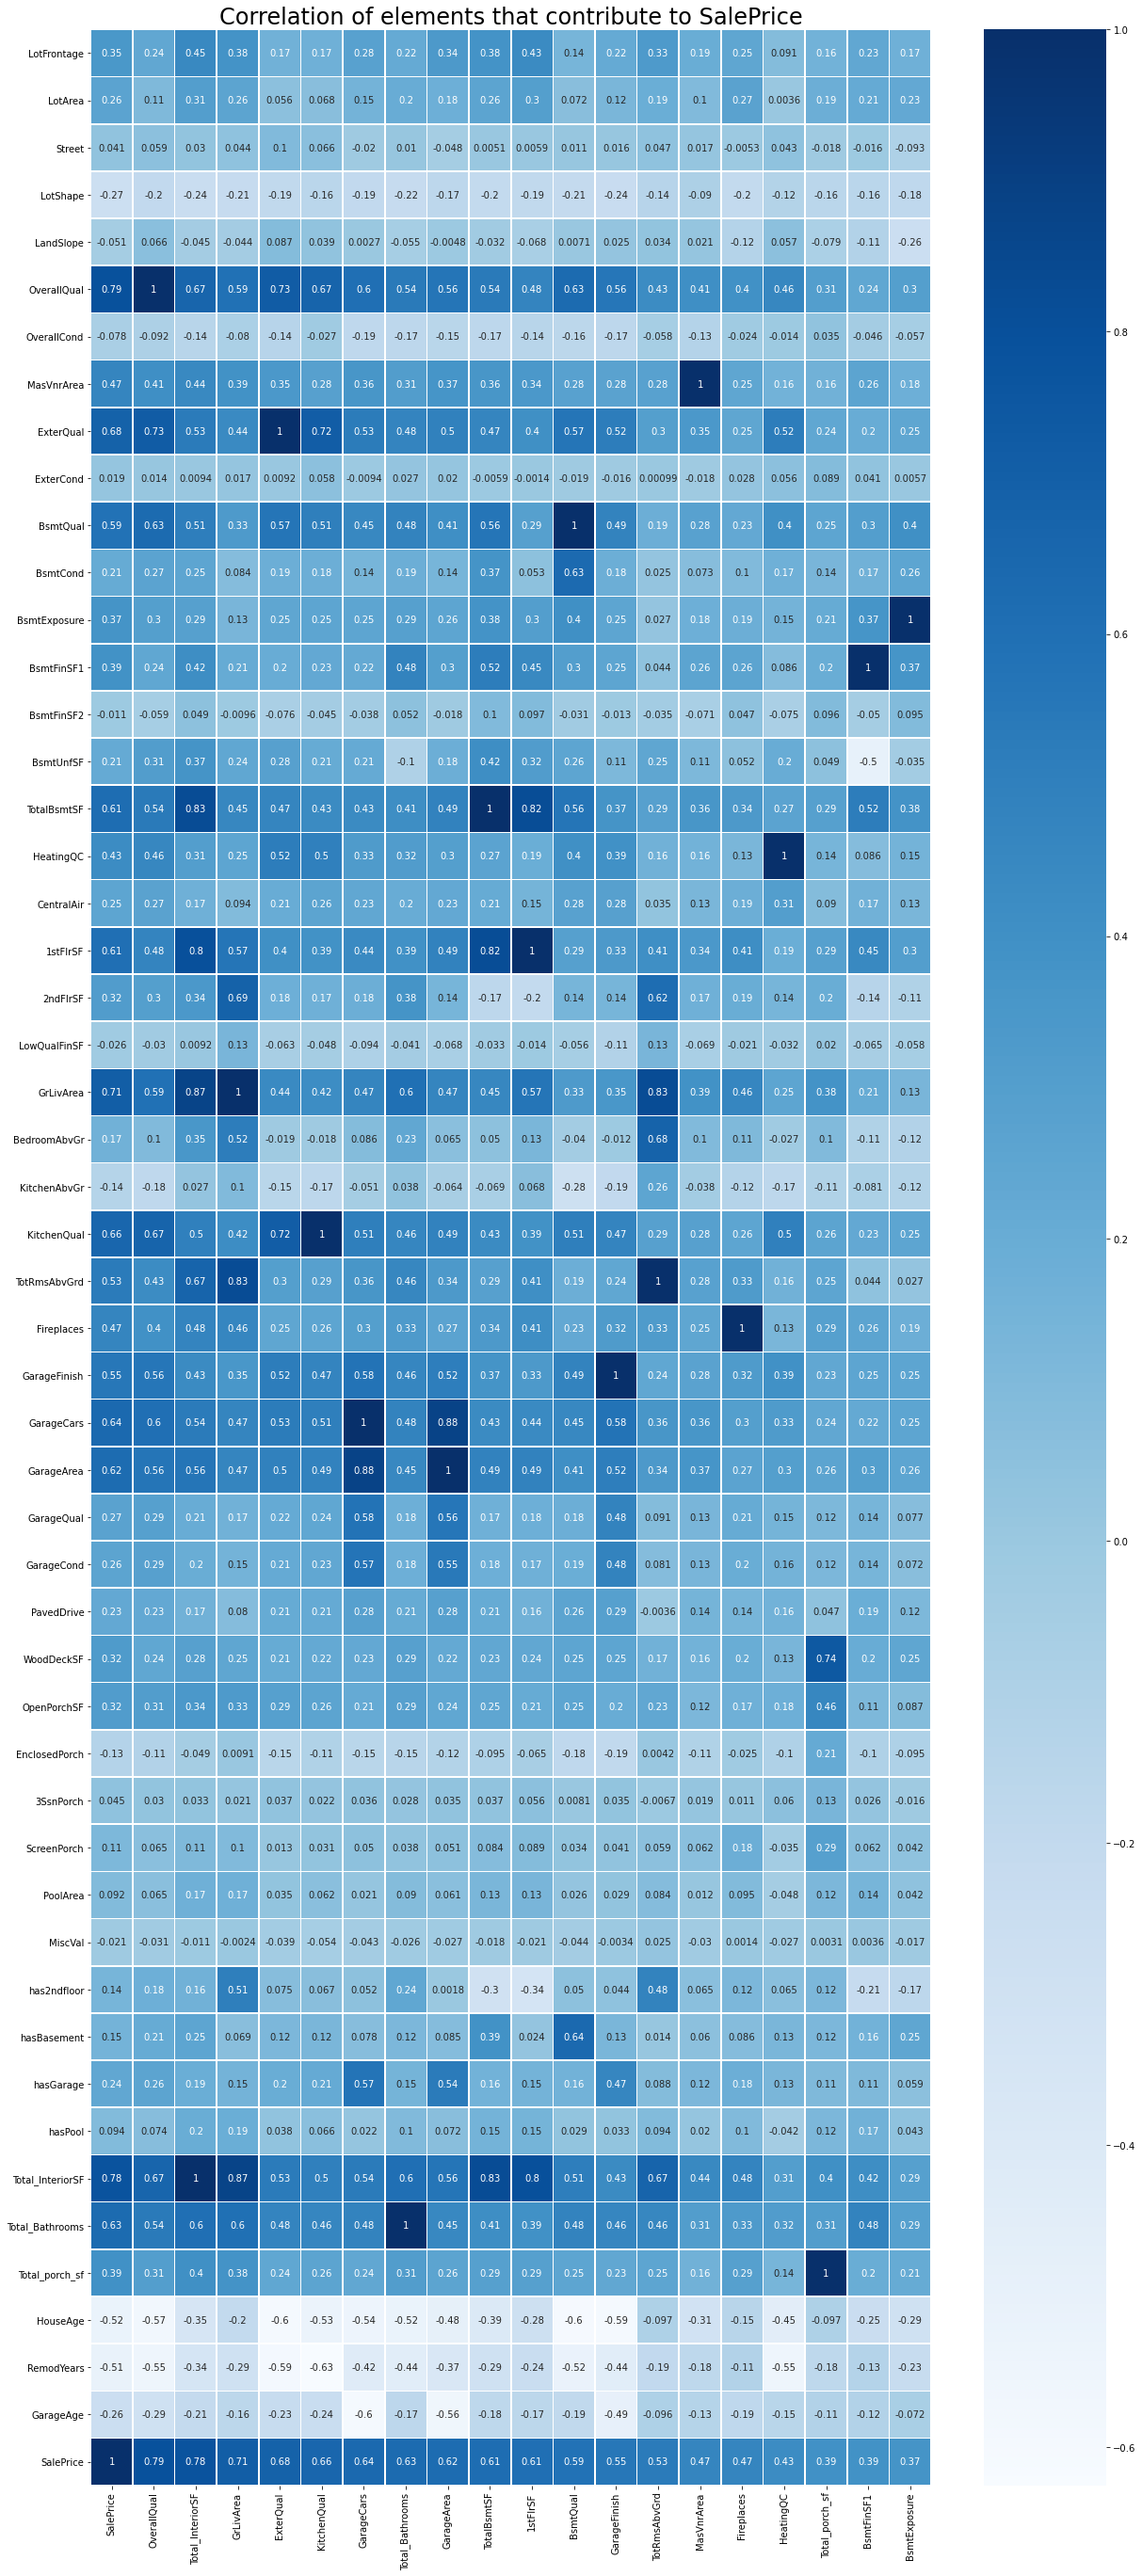

In [202]:
corr_fort = corr['SalePrice'].sort_values(ascending=False)[:20].index

plt.figure(figsize=(20, 48))
sns.heatmap(corr[corr_fort], annot=True, linewidth=0.6, cmap="Blues")
plt.title('Correlation of elements that contribute to SalePrice', fontsize=24)
plt.show()

#### Variables à faible corrélation

In [203]:
corr['SalePrice'].sort_values(ascending=True)[:20]

HouseAge        -0.523350
RemodYears      -0.509096
LotShape        -0.267759
GarageAge       -0.261441
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
OverallCond     -0.077856
LandSlope       -0.051152
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtFinSF2      -0.011378
ExterCond        0.018899
Street           0.041036
3SsnPorch        0.044584
PoolArea         0.092404
hasPool          0.093708
ScreenPorch      0.111447
has2ndfloor      0.137656
hasBasement      0.152829
BedroomAbvGr     0.168213
Name: SalePrice, dtype: float64

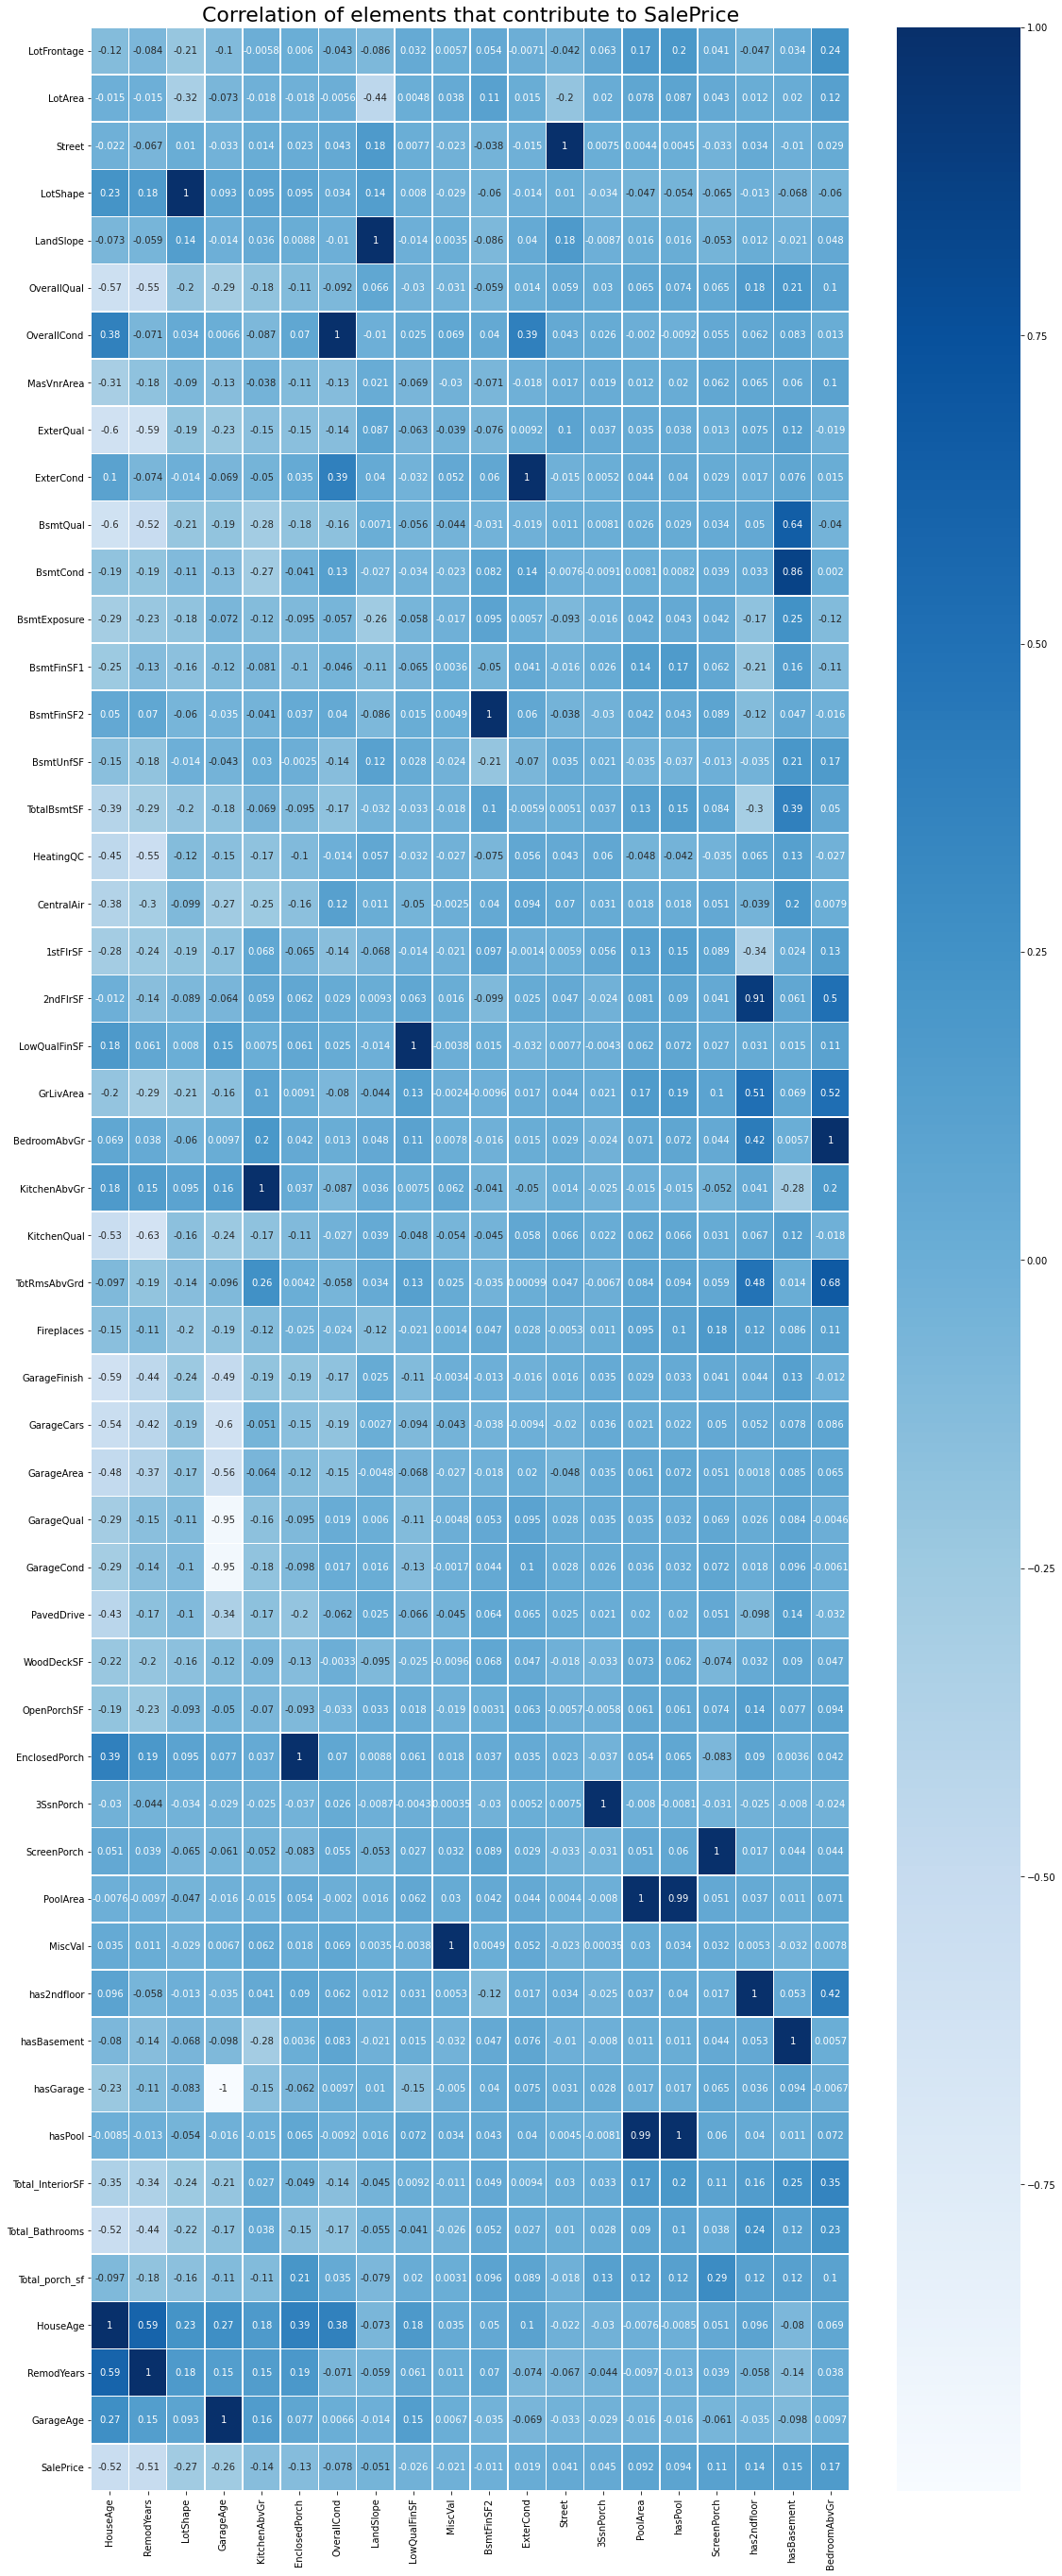

In [204]:
corr_faible = corr['SalePrice'].sort_values(ascending=True)[:20].index

plt.figure(figsize=(18, 48))
sns.heatmap(corr[corr_faible], annot=True, linewidth=0.6, cmap="Blues")
plt.title('Correlation of elements that contribute to SalePrice', fontsize=22)
plt.show()

Les variables très corrélées entre elles:
    
   - GrLivArea, TotalBsmtSF, 1stFlrSF, TotalInteriorSF
   - GarageArea, GarageCars
   - has2ndfloor, 2ndFlrSF
   - BsmtCond, hasBasement
   - PoolArea, hasPool
   - GarageAge, GarageCond, hasGarage, GarageQual

In [205]:
Xtrain.drop(columns=['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea',
                     'has2ndfloor', 'hasBasement', 'PoolArea',
                     'GarageAge', 'GarageCond', 'hasGarage'],
            axis=1, inplace=True)

Xtest.drop(columns=['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageArea',
                    'has2ndfloor', 'hasBasement', 'PoolArea',
                    'GarageAge', 'GarageCond', 'hasGarage'],
           axis=1, inplace=True)

C:\Users\linaj\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


On supprime les variables qui sont très faiblement corrélées avec le target avec une corrélation < ±0.05.

In [209]:
corr['SalePrice'].sort_values(ascending=True)[5:20]

EnclosedPorch   -0.128578
OverallCond     -0.077856
LandSlope       -0.051152
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtFinSF2      -0.011378
ExterCond        0.018899
Street           0.041036
3SsnPorch        0.044584
PoolArea         0.092404
hasPool          0.093708
ScreenPorch      0.111447
has2ndfloor      0.137656
hasBasement      0.152829
BedroomAbvGr     0.168213
Name: SalePrice, dtype: float64

In [ ]:
Xtrain.drop(columns=['LandSlope', 'LowQualFinSF', 'MiscVal', 'BsmtFinSF2',
                     'ExterCond', 'Street', '3SsnPorch'], axis=1, inplace=True)
Xtest.drop(columns=['LandSlope', 'LowQualFinSF', 'MiscVal', 'BsmtFinSF2',
                    'ExterCond', 'Street', '3SsnPorch'], axis=1, inplace=True)

#### Valeurs aberrantes

In [211]:
quant_feat = Xtrain.select_dtypes(include='float').columns
Xtrain[quant_feat].head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,...,OpenPorchSF,EnclosedPorch,ScreenPorch,hasPool,Total_InteriorSF,Total_Bathrooms,Total_porch_sf,HouseAge,RemodYears,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,3.0,7.0,5.0,196.0,4.0,4.0,3.0,1.0,...,61.0,0.0,0.0,0.0,2566.0,3.5,61.0,5.0,5.0,208500.0
2,80.0,9600.0,3.0,6.0,8.0,0.0,3.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,2524.0,2.5,298.0,31.0,31.0,181500.0
3,68.0,11250.0,2.0,7.0,5.0,162.0,4.0,4.0,3.0,2.0,...,42.0,0.0,0.0,0.0,2706.0,3.5,42.0,7.0,6.0,223500.0
4,60.0,9550.0,2.0,7.0,5.0,0.0,3.0,3.0,4.0,1.0,...,35.0,272.0,0.0,0.0,2473.0,2.0,307.0,91.0,36.0,140000.0
5,84.0,14260.0,2.0,8.0,5.0,350.0,4.0,4.0,3.0,3.0,...,84.0,0.0,0.0,0.0,3343.0,3.5,276.0,8.0,8.0,250000.0


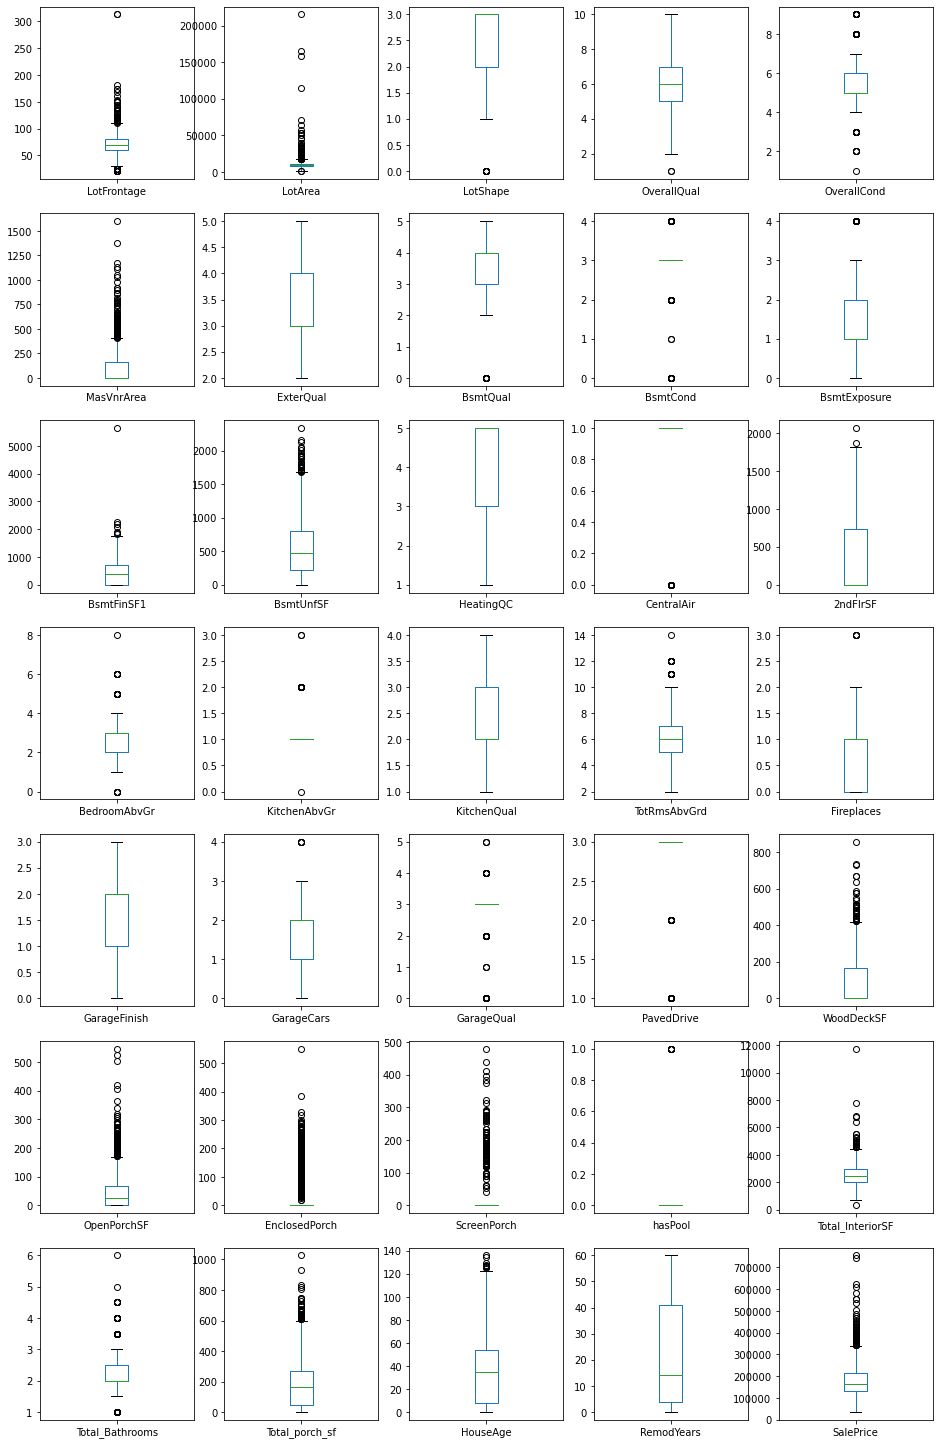

In [214]:
Xtrain[quant_feat].plot(kind='box', subplots=True, figsize=(16, 26),
                        layout=(7, 5))
plt.show()

C:\Users\linaj\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


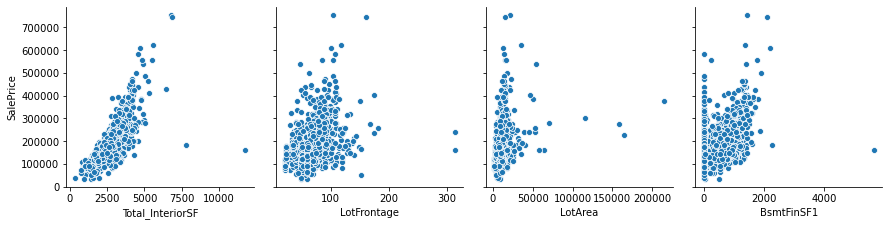

In [217]:
ax = sns.pairplot(Xtrain, size=3, x_vars=['Total_InteriorSF', 'LotFrontage',
                                          'LotArea', 'BsmtFinSF1'],
                  y_vars=['SalePrice'])
plt.show()

In [219]:
Xtrain[Xtrain['Total_InteriorSF'] > 7000][['Total_InteriorSF', 'LotFrontage',
                                           'LotArea', 'BsmtFinSF1']]

,Total_InteriorSF,LotFrontage,LotArea,BsmtFinSF1
Id,,,,
524,7814.0,130.0,40094.0,2260.0
1299,11752.0,313.0,63887.0,5644.0


In [221]:
Xtrain[Xtrain['LotFrontage'] > 300][['Total_InteriorSF', 'LotFrontage',
                                    'LotArea', 'BsmtFinSF1']]

,Total_InteriorSF,LotFrontage,LotArea,BsmtFinSF1
Id,,,,
935,2654.0,313.0,27650.0,425.0
1299,11752.0,313.0,63887.0,5644.0


In [223]:
Xtrain[Xtrain['LotArea'] > 100000][['Total_InteriorSF', 'LotArea',
                                    'BsmtFinSF1']]

,Total_InteriorSF,LotArea,BsmtFinSF1
Id,,,
250,3588.0,159000.0,697.0
314,4172.0,215245.0,1236.0
336,3285.0,164660.0,1249.0
707,3467.0,115149.0,1219.0


In [224]:
Xtrain.drop(axis=0, index=[250, 314, 336, 524, 935, 1299], inplace=True)

C:\Users\linaj\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Transformation au log

In [226]:
Sknew = Xtrain[quant_feat].skew()
skewed_features = Sknew[np.abs(Xtrain[quant_feat].skew()) > 0.5].index
skewed_features

Index(['LotFrontage', 'LotArea', 'LotShape', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtUnfSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageQual', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'hasPool',
       'Total_InteriorSF', 'Total_porch_sf', 'HouseAge', 'RemodYears',
       'SalePrice'],
      dtype='object')

In [228]:
# Performing log(1+x) transformation
skewed_features = skewed_features[:-1]
Xtrain[skewed_features] = np.log1p(Xtrain[skewed_features])
Xtest[skewed_features] = np.log1p(Xtest[skewed_features])

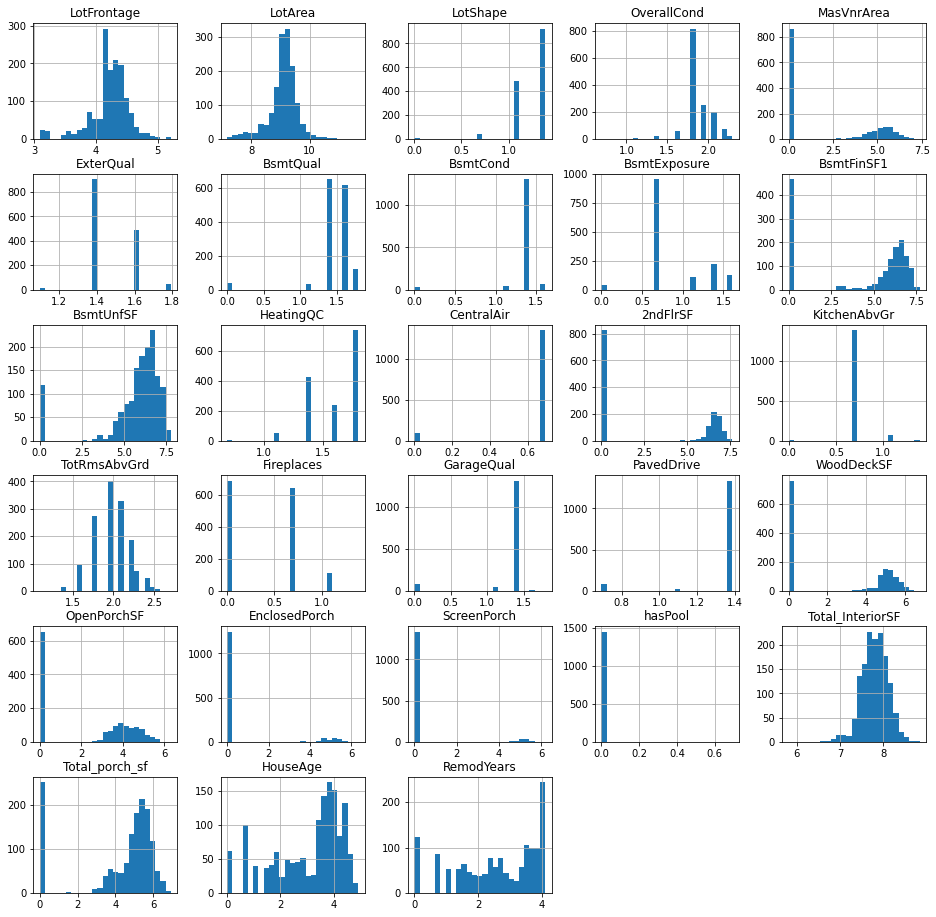

In [230]:
Xtrain[skewed_features].hist(figsize=(16, 16), layout=(6, 5), bins=25)
plt.show()

### Exoprt data

In [231]:
Xtrain.to_csv('new_train.csv', index=True, header=True)
Xtest.to_csv('new_test.csv', index=True, header=True)